In [22]:
import pandas as pd ,numpy as np

election=pd.read_csv('https://assets.datacamp.com/production/repositories/502/datasets/502f4eedaf44ad1c94b3595c7691746f282e0b0a/pennsylvania2012_turnout.csv',index_col='county')
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [30]:
# Assign the row position of election.loc['Bedford']: x
x = 4

# Assign the column position of election['winner']: y
y = 4

# Print the boolean equivalence
print(election.iloc[x, y] == election.loc['Bedford','winner'])

True


In [36]:
election.loc[['Adams','Bedford'],['state','total','Obama','Romney']]

,state,total,Obama,Romney
county,,,,
Adams,PA,41973,35.482334,63.112001
Bedford,PA,21444,22.057452,76.986570


In [34]:
election.loc['Perry': 'Potter',['state','total','Obama','Romney']]

,state,total,Obama,Romney
county,,,,
Perry,PA,18240,29.769737,68.591009
Philadelphia,PA,653598,85.224251,14.051451
Pike,PA,23164,43.904334,54.882576
Potter,PA,7205,26.259542,72.158223


In [37]:
election.loc['Perry': 'Potter','state':'Romney']

,state,total,Obama,Romney
county,,,,
Perry,PA,18240,29.769737,68.591009
Philadelphia,PA,653598,85.224251,14.051451
Pike,PA,23164,43.904334,54.882576
Potter,PA,7205,26.259542,72.158223


In [40]:
# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
election.loc['Potter':'Perry':-1,'Romney':'state':-1]

,Romney,Obama,total,state
county,,,,
Potter,72.158223,26.259542,7205,PA
Pike,54.882576,43.904334,23164,PA
Philadelphia,14.051451,85.224251,653598,PA
Perry,68.591009,29.769737,18240,PA


In [28]:
# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())

           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


## Subselecting DataFrames with lists

In [44]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows,cols]

# Print the three_counties DataFrame
print(three_counties)

              winner      Obama     Romney
county                                    
Philadelphia   Obama  85.224251  14.051451
Centre        Romney  48.948416  48.977486
Fulton        Romney  21.096291  77.748861


# Filtering DataFrames


In [45]:
election.Romney >40

county
Adams           True
Allegheny       True
Armstrong       True
Beaver          True
Bedford         True
                ... 
Washington      True
Wayne           True
Westmoreland    True
Wyoming         True
York            True
Name: Romney, Length: 67, dtype: bool

In [50]:
election[election.Romney >40].head(4)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012


In [55]:
election[(election.Romney >40) & (election.winner=='Romney')].head(4)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [56]:
election[(election.winner=='Obama') | (election.winner=='Romney')].head(4)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012


In [117]:
# Create the boolean array: high_turnout
high_turnout = election['turnout'] > 70
high_turnout

county
Adams           False
Allegheny       False
Armstrong       False
Beaver          False
Bedford         False
                ...  
Washington      False
Wayne           False
Westmoreland     True
Wyoming         False
York            False
Name: turnout, Length: 67, dtype: bool

In [118]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election.loc[high_turnout]

# Print the high_turnout_results DataFrame
print(high_turnout_df)

             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


# Filtering columns using other columns

To convert the entries of the 'winner' column, you need to first select it along with the too_close array using election.loc[]. Inside .loc[], too_close should be passed in before 'winner'.

In [123]:
# Import numpy
import numpy as np

# Create the boolean array: too_close
too_close = election['margin'] < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.loc[too_close, 'winner'] = np.nan

# Print the output of election.info()
print(election.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    67 non-null     object 
 1   total    67 non-null     int64  
 2   Obama    67 non-null     float64
 3   Romney   67 non-null     float64
 4   winner   64 non-null     object 
 5   voters   67 non-null     int64  
 6   turnout  67 non-null     float64
 7   margin   67 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None


In [130]:
election.loc[election['margin'] < 1, 'winner']


county
Berks      NaN
Centre     NaN
Chester    NaN
Name: winner, dtype: object

In [124]:
too_close

county
Adams           False
Allegheny       False
Armstrong       False
Beaver          False
Bedford         False
                ...  
Washington      False
Wayne           False
Westmoreland    False
Wyoming         False
York            False
Name: margin, Length: 67, dtype: bool

winner   64 non-null states that 3 values are turned to nan as there winner value were less the 1 percent

In [147]:
import numpy as np, pandas as pd

df={'month':['jan','feb','march','apr'],
   'salts':[23,34,np.nan,25],
   'becon':[20,0,0,31]}

In [148]:
df=pd.DataFrame(df)
df.set_index("month")


,salts,becon
month,,
jan,23.0,20
feb,34.0,0
march,NaN,0
apr,25.0,31


## Copy

In [149]:
df2 = df.copy()
df2=df2.set_index("month")
df2

,salts,becon
month,,
jan,23.0,20
feb,34.0,0
march,NaN,0
apr,25.0,31


## all clumns with non zero

In [150]:
df2.loc[:,df2.all()]

,salts
month,
jan,23.0
feb,34.0
march,NaN
apr,25.0


## any no of zeros

In [151]:
df2.loc[:,df2.any()]

,salts,becon
month,,
jan,23.0,20
feb,34.0,0
march,NaN,0
apr,25.0,31


## columns with any nan

In [152]:
df2.loc[:,df2.isnull().any()]

,salts
month,
jan,23.0
feb,34.0
march,NaN
apr,25.0


## without nan

In [153]:
df2.loc[:,df2.notnull().all()]

,becon
month,
jan,20
feb,0
march,0
apr,31


In [154]:
df2.dropna(how='any')

,salts,becon
month,,
jan,23.0,20
feb,34.0,0
apr,25.0,31


In [155]:
df2.dropna(how='all')

,salts,becon
month,,
jan,23.0,20
feb,34.0,0
march,NaN,0
apr,25.0,31


In [156]:
df2.floordiv(2)

,salts,becon
month,,
jan,11.0,10
feb,17.0,0
march,NaN,0
apr,12.0,15


In [157]:
import numpy as np

np.floor_divide(df2,2)

,salts,becon
month,,
jan,11.0,10.0
feb,17.0,0.0
march,NaN,0.0
apr,12.0,15.0


In [158]:
def dozen(n):
    return n//12
df2.apply(dozen)



,salts,becon
month,,
jan,1.0,1
feb,2.0,0
march,NaN,0
apr,2.0,2


In [159]:
df2.apply(lambda n: n//12)

,salts,becon
month,,
jan,1.0,1
feb,2.0,0
march,NaN,0
apr,2.0,2


# data frame index

In [160]:
df2.index

Index(['jan', 'feb', 'march', 'apr'], dtype='object', name='month')

In [162]:
df2.index = df2.index.str.upper()
df2

,salts,becon
month,,
JAN,23.0,20
FEB,34.0,0
MARCH,NaN,0
APR,25.0,31


In [163]:
df2.index = df2.index.map(str.lower)
df2

,salts,becon
month,,
jan,23.0,20
feb,34.0,0
march,NaN,0
apr,25.0,31


# Using apply() to transform a column

In [164]:
weather = pd.read_csv('https://assets.datacamp.com/production/repositories/502/datasets/6c4984cb81ea50971c1660434cc4535a6669a848/pittsburgh2013.csv')

# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)

# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())

   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


## Using .map() with a dictionary
Your job is to use a dictionary to map the values 'Obama' and 'Romney' in the 'winner' column to the values 'blue' and 'red', and assign the output to the new column 'color'

In [165]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election['winner'].map(red_vs_blue)

# Print the output of election.head()
print(election.head())

          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


# Using vectorized functions
When performance is paramount, you should avoid using .apply() and .map() because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame. By using vectorized functions instead, you can loop over the data at the same speed as compiled code (C, Fortran, etc.)! NumPy, SciPy and pandas come with a variety of vectorized functions (called Universal Functions or UFuncs in NumPy).

In [167]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
print(election.head())

<class 'numpy.ndarray'>
          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  turnout_zscore  
county                                      
Adams      27.629667   red        0.853734  
Allegheny  14.454399  blue        0.439846  
Armstrong  37.204293   red        0.575650  
Beaver      6.605012   red        1.018647  
Bedford    54.929118   red        0.463391  


In [178]:
import numpy as np, pandas as pd

df={'month':['jan','feb','march','apr'],
   'salts':[23,34,np.nan,25],
   'becon':[20,0,0,31]}
df=pd.DataFrame(df)
df = df.set_index("month")

# Create the list of new indexes: new_idx
new_idx = [x.upper() for x in df.index]

# Assign new_idx to sales.index
df.index = new_idx

# Print the sales DataFrame
print(df)

       salts  becon
JAN     23.0     20
FEB     34.0      0
MARCH    NaN      0
APR     25.0     31


In [179]:
for i in df.index:
    print(i.lower())

jan
feb
march
apr


# Hierarchical indexing


In [184]:
weather = pd.read_csv("https://assets.datacamp.com/production/repositories/502/datasets/6c4984cb81ea50971c1660434cc4535a6669a848/pittsburgh2013.csv")


weather = weather.set_index(['Date',"Events"])
weather = weather.sort_index()

weather.head()


,,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
Date,Events,,,,,,,,,,,,,,,,,,,,,
2013-1-1,Snow,32,28,21,30,27,16,100,89,77,30.10,...,29.94,10,6,2,10,8,NaN,0.00,8,277
2013-1-10,NaN,41,34,30,29,27,25,85,69,53,30.63,...,30.31,10,10,8,10,6,NaN,0.00,0,72
2013-1-11,Fog-Rain,53,47,41,52,44,26,100,86,51,30.29,...,29.96,10,7,0,9,7,NaN,0.15,6,160
2013-1-12,Fog-Rain,62,55,48,56,52,48,100,94,72,30.09,...,29.96,10,5,0,10,7,18.0,0.02,6,181
2013-1-13,Rain,68,62,55,56,53,51,100,77,61,29.95,...,29.86,10,9,4,21,9,26.0,0.16,4,190


In [197]:
weather.loc[['2013-1-11', 'Fog-Rain',],:]

,,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
Date,Events,,,,,,,,,,,,,,,,,,,,,
2013-1-11,Fog-Rain,53,47,41,52,44,26,100,86,51,30.29,...,29.96,10,7,0,9,7,NaN,0.15,6,160


In [201]:
weather.loc[(['2013-1-11','2013-1-12'], 'Fog-Rain'), ['Max TemperatureF'] ]

,,Max TemperatureF
Date,Events,
2013-1-11,Fog-Rain,53
2013-1-12,Fog-Rain,62


In [208]:
weather.loc[(slice(None), 'Fog-Rain'), ['Max TemperatureF']]

,,Max TemperatureF
Date,Events,
2013-1-11,Fog-Rain,53
2013-1-12,Fog-Rain,62
2013-1-16,Fog-Rain,34
2013-10-19,Fog-Rain,53
2013-10-3,Fog-Rain,78
2013-10-5,Fog-Rain,82
2013-12-29,Fog-Rain,44
2013-12-9,Fog-Rain,37
2013-6-18,Fog-Rain,77


thresh= keyword argument to drop columns from the full dataset that have less than 1000 non-missing values.

# Pivoting DataFrames


In [217]:
trail = {"id":[1,2,3,4],
         "treatment":['A','A','B','B'],
         "gender":['F','M','F','M'],
         'response':[5,3,8,9]}
trails = pd.DataFrame(trail)
trails

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,B,F,8
3,4,B,M,9


In [211]:
trails.pivot(index = 'treatment',
            columns = 'gender',
            values = 'response')

gender,F,M
treatment,,
A,5,3
B,8,9


In [214]:
trails.pivot(index = 'treatment',
            columns = 'gender')

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

# unstacking

In [219]:
t1 = trails.set_index(["treatment",'gender'])
t1

id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9

## moving the second layer of index to column

In [227]:
t1.unstack(level = 0)

id    response   
treatment  A  B        A  B
gender                     
F          1  3        5  8
M          2  4        3  9

In [229]:
t2 = t1.unstack(level="gender")
t2

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

## stack back again

In [230]:
t2.stack(level = "gender")

id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9

## but gender was added to inner level index if you want to index at outer level

In [232]:
swapped = t1.swaplevel(0, 1)
swapped

,,id,response
gender,treatment,,
F,A,1,5
M,A,2,3
F,B,3,8
M,B,4,9


In [233]:
swapped.sort_index()

id  response
gender treatment              
F      A           1         5
       B           3         8
M      A           2         3
       B           4         9

# Melting DataFrames


## to restore pivoted dataframe to original dataframe

In [239]:
trails.reset_index()
pd.melt(trails, id_vars = "treatment",
                var_name = "gender",
                value_name = "response")

,treatment,gender,response
0,A,id,1
1,A,id,2
2,B,id,3
3,B,id,4
4,A,gender,F
5,A,gender,M
6,B,gender,F
7,B,gender,M
8,A,response,5
9,A,response,3


In [240]:
pd.melt(trails,col_level=0)

,variable,value
0,id,1
1,id,2
2,id,3
3,id,4
4,treatment,A
5,treatment,A
6,treatment,B
7,treatment,B
8,gender,F
9,gender,M


# Pivot tables


In [243]:
swapped.pivot_table(index = "treatment",
                columns = "gender",
                values = "response")

gender,F,M
treatment,,
A,5,3
B,8,9


In [244]:
swapped.pivot_table(index = "treatment",
                columns = "gender",
                values = "response",
                aggfunc = 'count')

gender,F,M
treatment,,
A,1,1
B,1,1


In [246]:
swapped.pivot_table(index = "treatment",
                aggfunc = len)

,id,response
treatment,,
A,2,2
B,2,2


In [247]:
swapped.pivot_table(index = "treatment",
                aggfunc = sum)

,id,response
treatment,,
A,3,8
B,7,17


### specifying margins=True resulted in the totals in each column being computed.

In [249]:
swapped.pivot_table(index = "treatment",
                aggfunc = sum , margins = True)

,id,response
treatment,,
A,3,8
B,7,17
All,10,25


# Categoricals and groupby


In [252]:
df2.head()

,salts,becon
month,,
jan,23.0,20
feb,34.0,0
march,NaN,0
apr,25.0,31


In [255]:
df2.groupby(['month'])[['becon','salts']].mean()

,becon,salts
month,,
apr,31,25.0
feb,0,34.0
jan,20,23.0
march,0,NaN


In [258]:
df2["becon"].unique()

array([20,  0, 31])

In [132]:
titanic = pd.read_csv('https://assets.datacamp.com/production/repositories/502/datasets/e280ed94bf4539afb57d8b1cbcc14bcf660d3c63/titanic.csv')
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [133]:
# Select the 'age' and 'cabin' columns: df
df = titanic[['age' , 'cabin']]

# Print the shape of df
print(df.shape)

# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape) # remove any row with na value

# Drop rows in df with how='all' and print the shape
print(df.dropna(how='all').shape)  # remove  row with all na value

# Drop columns in titanic with less than 1000 non-missing values
print(titanic.dropna(thresh=1000, axis='columns').info())

(1309, 2)
(272, 2)
(1069, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB
None


In [259]:
# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
print(count_by_class)

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked','pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

# Print count_mult
print(count_mult)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64
embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


In [261]:
life = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv')
life.head()

,Country,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,33.639,34.152,34.662,35.170,35.674,36.172,36.663,37.143,37.614,...,56.583,57.071,57.582,58.102,58.618,59.124,59.612,60.079,60.524,60.947
1,Albania,65.475,65.863,66.122,66.316,66.500,66.702,66.948,67.251,67.595,...,75.725,75.949,76.124,76.278,76.433,76.598,76.780,76.979,77.185,77.392
2,Algeria,47.953,48.389,48.806,49.205,49.592,49.976,50.366,50.767,51.195,...,69.682,69.854,70.020,70.180,70.332,70.477,70.615,70.747,70.874,71.000
3,Angola,34.604,35.007,35.410,35.816,36.222,36.627,37.032,37.439,37.846,...,48.036,48.572,49.041,49.471,49.882,50.286,50.689,51.094,51.498,51.899
4,Antigua and Barbuda,63.775,64.149,64.511,64.865,65.213,65.558,65.898,66.232,66.558,...,74.355,74.544,74.729,74.910,75.087,75.263,75.437,75.610,75.783,75.954


In [262]:
regions= pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv')
regions.head()


,Country,region
0,Afghanistan,South Asia
1,Albania,Europe & Central Asia
2,Algeria,Middle East & North Africa
3,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,America


In [263]:
# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

# Print the mean over the '2010' column of life_by_region
print(life_by_region['2010'].mean())

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64


In [265]:
life_by_region['2010']

In [268]:
import numpy as np, pandas as pd

df={'month':['jan','feb','march','apr'],
   'salts':[23,34,34,25],
   'becon':[20,23,45,31],
   "city":["austin","dallas","austin","dallas"]}

df=pd.DataFrame(df)
df.set_index("month")

,salts,becon,city
month,,,
jan,23,20,austin
feb,34,23,dallas
march,34,45,austin
apr,25,31,dallas


In [269]:
df.groupby("city")[["salts","becon"]].max()

,salts,becon
city,,
austin,34,45
dallas,34,31


## multiple aggregation
sum , mean , count

In [271]:
df.groupby("city")[["salts","becon"]].agg(['max','sum'])

salts     becon    
         max sum   max sum
city                      
austin    34  57    45  65
dallas    34  59    31  54

## custome aggregation

In [272]:
def data_range(series):
    return series.max() - series.min()

In [273]:
df.groupby("city")[["salts","becon"]].agg(data_range)

,salts,becon
city,,
austin,11,25
dallas,9,8


## custom aggregation dictionary

In [282]:
df.groupby("city")[["salts","becon"]].agg({"salts":'max',"becon":data_range})

,salts,becon
city,,
austin,34,25
dallas,34,8


In [283]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max','median'])

# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

# Print the median fare in each class
print(aggregated.loc[:, ('fare','median')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64
pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


In [284]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('https://assets.datacamp.com/production/repositories/502/datasets/09378cc53faec573bcb802dce03b01318108a880/gapminder_tidy.csv',
                        index_col=['Year','region','Country']).sort_index()

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level=['Year','region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
print(aggregated.tail(6))

                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


In [301]:
auto = pd.read_csv('auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [300]:
def zscore(series):
    return ( series - series.mean())/series.std()

In [302]:
zscore(auto['mpg']).head()

0   -0.705551
1   -1.089379
2   -0.705551
3   -0.961437
4   -0.833494
Name: mpg, dtype: float64

### mpg zscore by year

In [306]:
auto.groupby('model year')['mpg'].transform(zscore).head()

0    0.058125
1   -0.503753
2    0.058125
3   -0.316460
4   -0.129168
Name: mpg, dtype: float64

In [313]:
def zscore_yr_nam(group):
    df = pd.DataFrame(
         {'mpg': zscore(group['mpg']),
         'year': group['model year'],
         'name':group['car name']})
    return df

In [318]:
auto.groupby('model year').apply(zscore_yr_nam).head()

,mpg,year,name
0,0.058125,70,chevrolet chevelle malibu
1,-0.503753,70,buick skylark 320
2,0.058125,70,plymouth satellite
3,-0.316460,70,amc rebel sst
4,-0.129168,70,ford torino


In [322]:
zscore_yr_nam(auto).head()

,mpg,year,name
0,-0.705551,70,chevrolet chevelle malibu
1,-1.089379,70,buick skylark 320
2,-0.705551,70,plymouth satellite
3,-0.961437,70,amc rebel sst
4,-0.833494,70,ford torino


In this example, you're going to normalize the Gapminder data in 2010 for life expectancy and fertility by the z-score per region. Using boolean indexing, you will filter for countries that have high fertility rates and low life expectancy for their region.

In [325]:
# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder.groupby('region')['life','fertility'].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder.loc[outliers]

# Print gm_outliers
print(gm_outliers)

                                        fertility    life  population  \
Year region                Country                                      
1964 America               Bolivia          6.607  43.913   3668568.0   
                           Guatemala        6.434  47.884   4636016.0   
                           Haiti            6.233  44.464   4188276.0   
     East Asia & Pacific   Timor-Leste      6.347  35.724    537278.0   
     Europe & Central Asia Turkey           6.029  48.313  31109820.0   
...                                           ...     ...         ...   
1980 East Asia & Pacific   Timor-Leste      4.767  34.402    580707.0   
1981 East Asia & Pacific   Cambodia         5.850  35.788   6636869.0   
                           Timor-Leste      4.956  36.166    583764.0   
1994 Sub-Saharan Africa    Rwanda           6.416   6.000   5648306.0   
2010 America               Haiti            3.350  45.000   9993247.0   

                                        child_mort

/Users/knight/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


# Filling missing data (imputation) by group

### Your job is to fill in missing 'age' values for passengers on the Titanic with the median age from their 'gender' and 'pclass'. To do this, you'll group by the 'sex' and 'pclass' columns and transform each group with a custom function to call .fillna() and impute the median value.

In [328]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex','pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic['age']
titanic.age = by_sex_class['age'].transform(impute_median)

# Print the output of titanic.tail(10)
print(titanic.tail(10))

      pclass  survived                                     name     sex   age  \
1299       3         0                      Yasbeck, Mr. Antoni    male  27.0   
1300       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1301       3         0                     Youseff, Mr. Gerious    male  45.5   
1302       3         0                        Yousif, Mr. Wazli    male  25.0   
1303       3         0                    Yousseff, Mr. Gerious    male  25.0   
1304       3         0                     Zabour, Miss. Hileni  female  14.5   
1305       3         0                    Zabour, Miss. Thamine  female  22.0   
1306       3         0                Zakarian, Mr. Mapriededer    male  26.5   
1307       3         0                      Zakarian, Mr. Ortin    male  27.0   
1308       3         0                       Zimmerman, Mr. Leo    male  29.0   

      sibsp  parch  ticket     fare cabin embarked boat   body home.dest  
1299      1      0    2659  14.45

In [331]:
by_sex_class['age'].apply(impute_median)

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
        ...  
1304    14.50
1305    22.00
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 1309, dtype: float64

In [336]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})


# Group gapminder_2010 by 'region': regional
regional = gapminder.groupby('region')

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

# Print the disparity of 'United States', 'United Kingdom', and 'China'
print(reg_disp.loc[['United States','United Kingdom','China']])

Empty DataFrame
Columns: [z(gdp), regional spread(gdp)]
Index: []


In [353]:
p = gapminder.groupby('region')['gdp'].mean()
p

region
America                       11599.921875
East Asia & Pacific           13336.156923
Europe & Central Asia         18442.045417
Middle East & North Africa    27510.731579
South Asia                     2552.650000
Sub-Saharan Africa             3152.428511
Name: gdp, dtype: float64

In [344]:
gapminder.head()

fertility    life  population  \
Year region  Country                                              
1964 America Antigua and Barbuda      4.250  63.775     58653.0   
             Argentina                3.068  65.388  21966478.0   
             Aruba                    4.059  67.113     57031.0   
             Bahamas                  4.220  64.189    133709.0   
             Barbados                 4.094  62.819    234455.0   

                                  child_mortality      gdp  
Year region  Country                                        
1964 America Antigua and Barbuda            72.78   5008.0  
             Argentina                      57.43   8227.0  
             Aruba                            NaN   5505.0  
             Bahamas                        48.56  18160.0  
             Barbados                       64.70   5681.0

In [347]:
gapminder.loc[['gdp']].apply(disparity)

,,,fertility,life,population,child_mortality,gdp
Year,region,Country,,,,,


In [371]:
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


# splitting is done when you want data of specific column here chevrolet

In [391]:
splitting = auto.groupby('model year')

type(splitting.groups)

dict

In [370]:
print(splitting.groups.keys())

dict_keys([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])


## group by object iteration

In [372]:
for group_name, group in splitting:
    avg = group['mpg'].mean()
    print(group_name,avg)

70 6.758620689655173
71 5.571428571428571
72 5.821428571428571
73 6.375
74 5.2592592592592595
75 5.6
76 5.647058823529412
77 5.464285714285714
78 5.361111111111111
79 5.827586206896552
80 4.137931034482759
81 4.620689655172414
82 4.193548387096774


In [382]:
auto.loc[auto['car name'].str.contains("chevrolet")].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
12,15.0,8,400.0,150,3761,9.5,70,1,chevrolet monte carlo
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu


In [383]:
auto.loc[auto['car name'].str.contains("chevrolet"),'mpg'].head()

0     18.0
6     14.0
12    15.0
30    28.0
35    17.0
Name: mpg, dtype: float64

In [385]:
auto.loc[auto['car name'].str.contains("chevrolet"),'mpg'].mean()

20.472093023255816

# groupby object : iteration and filtering

In [408]:
for group_name, group in splitting:
    avg = group.loc[group['car name'].str.contains("chevrolet"),'mpg'].mean()
    print(group_name,avg)

70 15.666666666666666
71 20.25
72 15.333333333333334
73 14.833333333333334
74 18.666666666666668
75 17.666666666666668
76 23.25
77 20.25
78 23.233333333333334
79 21.666666666666668
80 30.05
81 23.5
82 29.0


In [418]:
for group_name, group in iterrows:
    avg = auto.loc[auto['car name'].str.contains("chevrolet"),'mpg'].mean()
    print(group_name,avg)

NameError: name 'iterrows' is not defined

# groupby object : comprehension

In [389]:
chevy_mean = { year:group.loc[group['car name'].str.contains('chevrolet'),'mpg'].mean()
                   for year , group in splitting}
pd.Series(chevy_mean)

70    15.666667
71    20.250000
72    15.333333
73    14.833333
74    18.666667
75    17.666667
76    23.250000
77    20.250000
78    23.233333
79    21.666667
80    30.050000
81    23.500000
82    29.000000
dtype: float64

# boolean groupby

In [387]:
chevy = auto['car name'].str.contains('chevrolet')

auto.groupby(['model year', chevy])['mpg'].mean()

model year  car name
70          False       17.923077
            True        15.666667
71          False       21.416667
            True        20.250000
72          False       19.120000
            True        15.333333
73          False       17.500000
            True        14.833333
74          False       23.208333
            True        18.666667
75          False       20.555556
            True        17.666667
76          False       21.350000
            True        23.250000
77          False       23.895833
            True        20.250000
78          False       24.136364
            True        23.233333
79          False       25.488462
            True        21.666667
80          False       33.966667
            True        30.050000
81          False       30.578571
            True        23.500000
82          False       32.111111
            True        29.000000
Name: mpg, dtype: float64

# Grouping and filtering with .apply()

In this exercise you'll take the Titanic data set and analyze survival rates from the 'C' deck, which contained the most passengers. To do this you'll group the dataset by 'sex' and then use the .apply() method on a provided user defined function which calculates the mean survival rates on the 'C' deck:

In [426]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')
# Call by_sex.apply with the function c_deck_survival
c_surv_by_sex =  by_sex.apply(c_deck_survival)

# Print the survival rates
print(c_surv_by_sex)

sex
female    0.913043
male      0.312500
dtype: float64


In this exercise your job is to investigate survival rates of passengers on the Titanic by 'age' and 'pclass'. In particular, the goal is to find out what fraction of children under 10 survived in each 'pclass'. You'll do this by first creating a boolean array where True is passengers under 10 years old and False is passengers over 10. You'll use .map() to change these values to strings.

Finally, you'll group by the under 10 series and the 'pclass' column and aggregate the 'survived' column. The 'survived' column has the value 1 if the passenger survived and 0 otherwise. The mean of the 'survived' column is the fraction of passengers who lived.

In [427]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64
age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


In [428]:
under10

0        over 10
1       under 10
2       under 10
3        over 10
4        over 10
          ...   
1304     over 10
1305     over 10
1306     over 10
1307     over 10
1308     over 10
Name: age, Length: 1309, dtype: object

In [429]:
titanic['age'] < 10

0       False
1        True
2        True
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [433]:
medals = pd.read_csv('https://assets.datacamp.com/production/repositories/502/datasets/bf22326ecc9171f68796ad805a7c1135288120b6/all_medalists.csv')
medals.head(2)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


In [464]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

### Using .pivot_table() to count medals by type

In [437]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


### Applying .drop_duplicates()

In [438]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


### Finding possible errors with .groupby()
You will now use .groupby() to continue your exploration. Your job is to group by 'Event_gender' and 'Gender' and count the rows.

In [439]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender','Gender'])


# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


### Locating suspicious data
You will now inspect the suspect record by locating the offending row.

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

In [440]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

#Use the Boolean Series to create a DataFrame called suspect with the suspicious row.
# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


# Using .nunique() to rank by distinct sports
You may want to know which countries won medals in the most distinct sports. The .nunique() method is the principal aggregation here. __Given a categorical Series S, S.nunique() returns the number of distinct categories.__

In [444]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


- Using medals, create a Boolean Series called during_cold_war that is True when 'Edition' is >= 1952 and <= 1988.<br>

- Using medals, create a Boolean Series called is_usa_urs that is True when 'NOC' is either 'USA' or 'URS'.<br>

- Filter the medals DataFrame using during_cold_war and is_usa_urs to create a new DataFrame called cold_war_medals.<br>

- Group cold_war_medals by 'NOC'.<br>

- Create a Series Nsports from country_grouped using indexing & chained methods:<br>
   - Extract the column 'Sport'.
   - Use .nunique() to get the number of unique elements in each group;
   - Apply .sort_values(ascending=False) to rearrange the Series.
   
- Print the final Series Nsports. This has been done for you, so hit 'Submit Answer' to see the result!

In [445]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (medals.Edition>=1952) & (medals.Edition<=1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


As you can see, the USSR is actually higher than the US when you look only at the Olympic competitions between 1952 and 1988!

### do not apply count function as it will count number USR AND USA rows

In [483]:
country_grouped['Medal'].count().sort_values(ascending=False)

NOC
URS    2049
USA    1495
Name: Medal, dtype: int64

In [480]:
country_grouped['Discipline'].nunique().sort_values(ascending=False)

NOC
USA    28
URS    28
Name: Discipline, dtype: int64

In [511]:
country_grouped['Medal'].value_counts()

NOC  Medal 
URS  Gold      838
     Silver    627
     Bronze    584
USA  Gold      730
     Silver    444
     Bronze    321
Name: Medal, dtype: int64

In [474]:
cold_war_medals

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
8019,Helsinki,1952,Aquatics,Diving,"LEE, Samuel",USA,Men,10m platform,M,Gold
8021,Helsinki,1952,Aquatics,Diving,"STOVER-IRWIN, Juno Roslays",USA,Women,10m platform,W,Bronze
8022,Helsinki,1952,Aquatics,Diving,"MCCORMICK, Patricia",USA,Women,10m platform,W,Gold
8023,Helsinki,1952,Aquatics,Diving,"MYERS-POPE, Paula Jean",USA,Women,10m platform,W,Silver
8024,Helsinki,1952,Aquatics,Diving,"CLOTWORTHY, Robert Lynn",USA,Men,3m springboard,M,Bronze
...,...,...,...,...,...,...,...,...,...,...
19583,Seoul,1988,Wrestling,Wrestling Gre-R,"DJULFALAKIAN, Levon",URS,Men,62 - 68kg (lightweight),M,Gold
19587,Seoul,1988,Wrestling,Wrestling Gre-R,"TURLYKHANOV, Daulet",URS,Men,68 - 74kg (welterweight),M,Silver
19589,Seoul,1988,Wrestling,Wrestling Gre-R,"MAMIASHVILI, Mikhail",URS,Men,74 - 82kg (middleweight),M,Gold
19591,Seoul,1988,Wrestling,Wrestling Gre-R,"POPOV, Vladimir",URS,Men,82 - 90kg (light-heavyweight),M,Bronze


## Counting USA vs. USSR Cold War Olympic Medals

For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.<br>

There are several steps involved in carrying out this computation.<br>

- You'll need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a NaN in that entry of the pivot table.<br>

- You'll need to slice the Cold War period and subset the 'USA' and 'URS' columns.<br>

- You'll need to make a Series from this slice of the pivot table that tells which country won the most medals in that edition using .idxmax(axis='columns'). If .max() returns the maximum value of Series or 1D array, .idxmax() returns the index of the maximizing element. The argument axis=columns or axis=1 is required because, by default, this aggregation would be done along columns for a DataFrame.<br>

- The final Series contains either 'USA' or 'URS' according to which country won the most medals in each Olympic edition. You can use .value_counts() to count the number of occurrences of each.

In [528]:
# Create the pivot table: medals_won_by_country
medals_won_by_country =  medals.pivot_table(index='Edition',
                                            columns= 'NOC',
                                            values = 'Medal',
                                            aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]


In [530]:
cold_war_usa_urs_medals

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


## idxmax
##### compare the value of column and returns the column with highest value but the return is column name string

In [531]:
# Create most_medals using .idxmax(axis='columns')
most_medals = cold_war_usa_urs_medals.idxmax( axis = 'columns')
most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

## value_counts

##### count the value of catagorical data -> how many time particual string occur in column

In [532]:
# Print most_medals.value_counts()
print(most_medals.value_counts(),'\n')
print("So between 1952 and 1988 URS and USA won 8 and 2 times")

URS    8
USA    2
dtype: int64 

So between 1952 and 1988 URS and USA won 8 and 2 times


# Visualizing USA Medal Counts by Edition: Line Plot

- Create a DataFrame usa with data only for the USA.
- Group usa such that ['Edition', 'Medal'] is the index. Aggregate the count over 'Athlete'.
- Use .unstack() with level='Medal' to reshape the DataFrame usa_medals_by_year.
- Construct a line plot from the final DataFrame usa_medals_by_year. This has been done for you, so hit 'Submit Answer' to see the plot!


In [493]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
import matplotlib.pyplot as plt
#usa_medals_by_year.plot()
#plt.show()

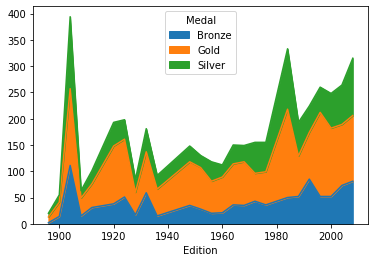

In [495]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

In [496]:
usa_medals_by_year.head(3)

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137


## Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. However, you would __prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.__

You can achieve this using Categorical types. In this final exercise, after redefining the 'Medal' column of the DataFrame medals, you will repeat the area plot from the previous exercise to see the new ordering.

- Redefine the 'Medal' column of the DataFrame medals as an ordered categorical. To do this, use __pd.Categorical()__ with three keyword arguments:
  - values = medals.Medal.
  - categories=['Bronze', 'Silver', 'Gold'].
  - ordered=True.
After this, you can verify that the type has changed using medals.info().

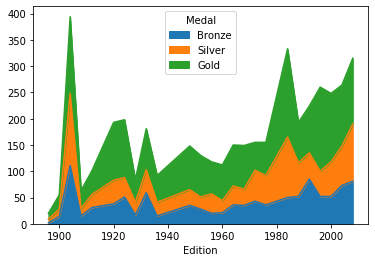

In [551]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal,
                              categories=['Bronze', 'Silver', 'Gold'],
                              ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

In [613]:
usa.groupby(['Edition', 'Medal'])['Athlete'].unique()

Edition  Medal 
1896     Bronze                     [LANE, Francis, CONNOLLY, James]
         Silver    [BLAKE, Arthur, JAMISON, Herbert, CONNOLLY, Ja...
         Gold      [BURKE, Thomas, CURTIS, Thomas, GARRETT, Rober...
1900     Bronze    [MOLONEY, Frederick, BRAY, John, TEWKSBURY, Wa...
         Silver    [TEWKSBURY, Walter B. John, MCLEAN, John, HOLL...
                                         ...                        
2004     Silver    [HANSEN, Brendan, CROCKER, Ian, JENSEN, Larsen...
         Gold      [PEIRSOL, Aaron, COUGHLIN, Natalie, PHELPS, Mi...
2008     Bronze    [HOELZER, Margaret, LEZAK, Jason, COUGHLIN, Na...
         Silver    [GREVERS, Matt, SONI, Rebecca, MAGNUSON, Chris...
         Gold      [PEIRSOL, Aaron, COUGHLIN, Natalie, PHELPS, Mi...
Name: Athlete, Length: 75, dtype: object

In [611]:
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['NOC'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')


usa_medals_by_year.loc[1952:1988]

Medal,Bronze,Silver,Gold
Edition,,,
1952,28,23,79
1956,20,37,61
1960,21,23,68
1964,36,36,78
1968,35,31,83
1972,43,59,53
1976,36,56,63
1984,50,115,168
1988,52,64,77


In [556]:
usa = medals[medals.NOC == 'USA']

usa = usa.pivot_table(index='Edition',
                      columns= 'Medal',
                      values = 'NOC',
                      aggfunc='count')

country_usa_urs = usa.loc[1952:1988, ['Gold','Silver','Bronze']]
country_usa_urs

Medal,Gold,Silver,Bronze
Edition,,,
1952,79,23,28
1956,61,37,20
1960,68,23,21
1964,78,36,36
1968,83,31,35
1972,53,59,43
1976,63,56,36
1984,168,115,50
1988,77,64,52
